<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/%EB%B2%A1%ED%84%B0DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q chromadb transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.5/405.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━

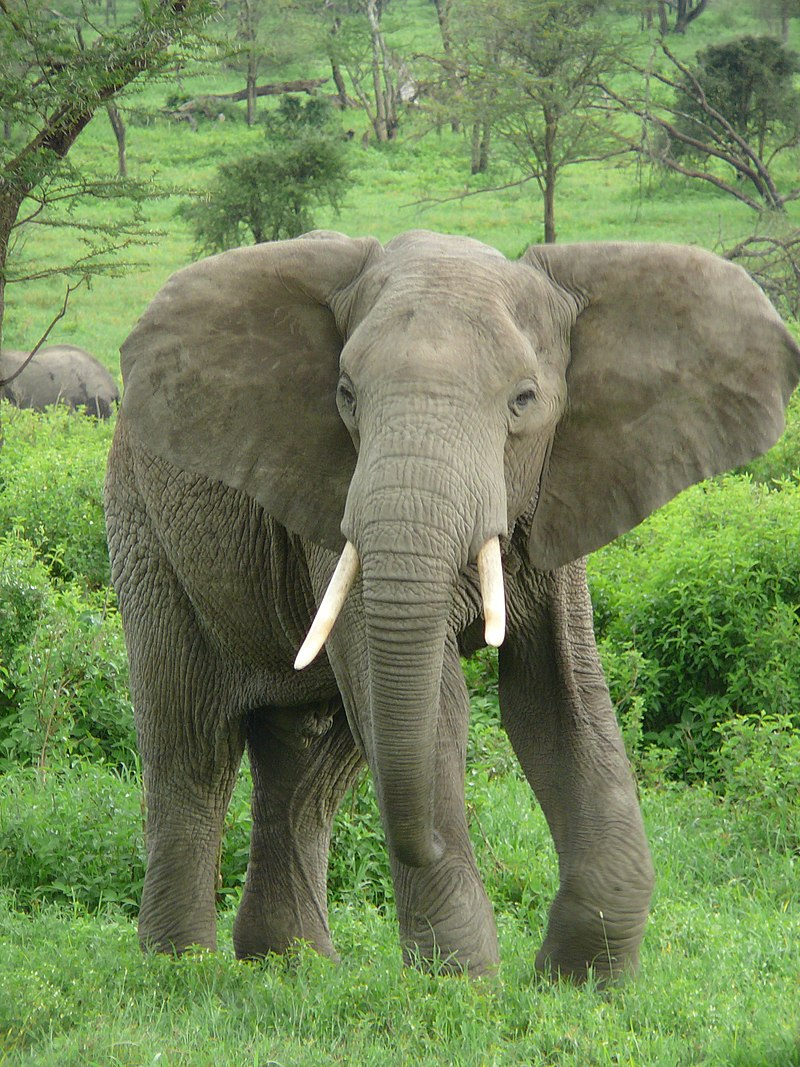

In [3]:
from PIL import Image

img = Image.open('/content/data/elephant/elephant_1.jpg')
img

In [6]:
from transformers import ViTFeatureExtractor, ViTModel

feature_extractor = ViTFeatureExtractor.from_pretrained('facebook/dino-vits16')
model = ViTModel.from_pretrained('facebook/dino-vits16')

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits16 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
img_tensor = feature_extractor(images=img, return_tensors='pt')
outputs = model(**img_tensor)

embedding = outputs.pooler_output.detach().cpu().numpy().squeeze()
embedding

array([ 0.10068112,  0.99691063,  0.74836713,  0.99034965,  0.9997795 ,
       -0.9082365 , -0.3324258 ,  0.9990617 ,  0.70980084, -0.70322496,
       -0.7373378 , -0.9852948 , -0.9284662 ,  0.92028105, -0.31693676,
       -0.8964946 , -0.97854465, -0.781933  ,  0.87712485,  0.9998689 ,
        0.99766076,  0.22160418, -0.9144969 , -0.99760073, -0.35578033,
       -0.76011366, -0.9327601 , -0.985211  ,  0.6126613 , -0.88621104,
        0.6619102 ,  0.7465357 ,  0.04891464,  0.83673614, -0.95411116,
        0.18413116,  0.35661373, -0.9033497 ,  0.45172167,  0.97312665,
        0.21434528,  0.77611256, -0.79766613,  0.6830249 ,  0.9748455 ,
       -0.9985239 ,  0.79100883,  0.7073959 , -0.911365  ,  0.9484583 ,
        0.05888695,  0.99884796, -0.9958073 ,  0.92250973, -0.9348158 ,
       -0.99980795, -0.7920991 , -0.99415004, -0.81562024, -0.6713943 ,
       -0.4116377 , -0.9452109 , -0.9874549 ,  0.9040165 , -0.9684476 ,
        0.78020227,  0.9322049 ,  0.37229958, -0.6592126 ,  0.08

In [8]:
len(embedding)

384

In [9]:
import chromadb
client = chromadb.Client()

collection = client.create_collection('test')

In [24]:
embeddings = []
metadatas = []
ids = []

from glob import glob
img_list = sorted(glob("data/*/*.*"))


for count,img_path in enumerate(img_list):
    img = Image.open(img_path)
    cls = img_path.split('/')[1] #elephant, hippo

    img_tensor = feature_extractor(images=img , return_tensors='pt')
    outputs = model(**img_tensor)

    embedding = outputs.pooler_output.detach().cpu().numpy().squeeze()
    embeddings.append(list(embedding.astype('float')))
    print(len(embedding))

    metadatas.append({
        'uri':img_path,
        'name':cls
    })

    ids.append(str(count))

384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384


In [25]:
len(embeddings)

20

In [26]:
len(metadatas)

20

In [27]:
len(ids)

20

In [28]:
collection.add(embeddings=embeddings, metadatas=metadatas,ids=ids)

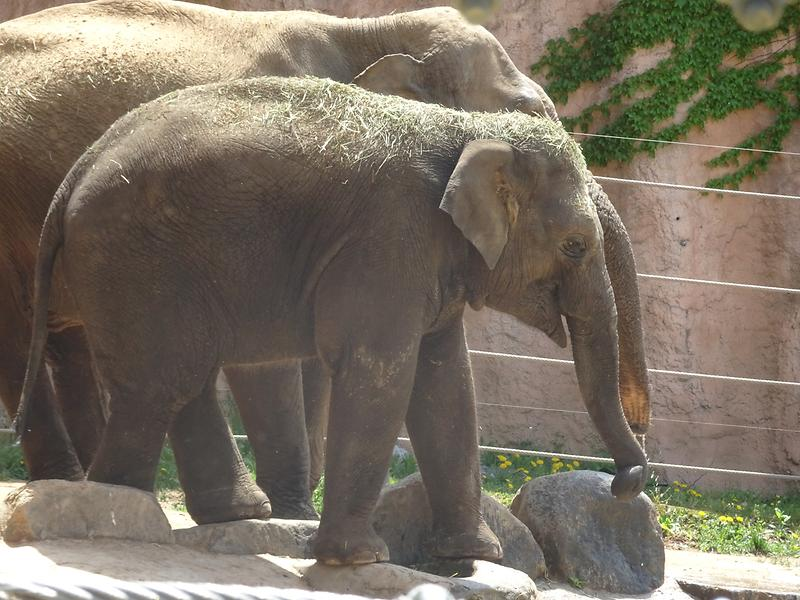

In [29]:
import requests

test_img = Image.open(requests.get('https://www.sisul.or.kr/open_content/childrenpark/bbs/bbsMsgFile.do;jsessionid=nhdpeolPzetgMdZYa4HY1j22xR2aaCaRpobvOuZQQ9vo5TaHxd1RxVnpYY1V9Y4p.etisw1_servlet_user?bcd=animal&msg_seq=16&fileno=1&size=middle',stream=True).raw).convert('RGB')
test_img

In [30]:
test_img_tensor = feature_extractor(images=test_img , return_tensors='pt')
test_outputs = model(**img_tensor)

test_embedding = outputs.pooler_output.detach().cpu().numpy().squeeze()embeddings = []
metadatas = []
ids = []

from glob import glob
img_list = sorted(glob("data/*/*.*"))


for count,img_path in enumerate(img_list):
    img = Image.open(img_path)
    cls = img_path.split('/')[1] #cat,dog,car

    img_tensor = feature_extractor(images=img , return_tensors='pt')
    outputs = model(**img_tensor)

    embedding = outputs.pooler_output.detach().cpu().numpy().squeeze()
    embeddings.append(list(embedding.astype('float')))
    print(len(embedding))

    metadatas.append({
        'uri':img_path,
        'name':cls
    })

    ids.append(str(count))
test_embedding.shape

(384,)

In [32]:
test_img_tensor = feature_extractor(images=test_img , return_tensors='pt')
test_outputs = model(**test_img_tensor)

test_embedding = test_outputs.pooler_output.detach().cpu().numpy().squeeze().astype('float')
test_embedding.shape

(384,)

In [ ]:
result = collection.query(
    query_embeddings=[list(test_embedding)],
    n_results=3
)

result